## **EX NO:**
##   **DATE :**
# <center>**DATA PREPROCESSING**</center>

## **AIM :**

### To write a Python program to perform data preprocessing on a dataset, including handling missing values, removing    unnecessary columns, treating outliers, and visualizing data distributions, to prepare the dataset for further analysis.

### **PROGRAM :**

### **Importing the libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer


#### **Importing the data set 1**

In [ ]:
df = pd.read_csv("/content/Uncleaned.csv")


In [ ]:
# Display the dataset
df.head()

index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

#### **Infomation about the data set 1**

In [ ]:
df.shape

(672, 15)

#### **Description of the Data Set 1**

In [ ]:
df.describe()

index      Rating      Founded
count  672.000000  672.000000   672.000000
mean   335.500000    3.518601  1635.529762
std    194.133974    1.410329   756.746640
min      0.000000   -1.000000    -1.000000
25%    167.750000    3.300000  1917.750000
50%    335.500000    3.800000  1995.000000
75%    503.250000    4.300000  2009.000000
max    671.000000    5.000000  2019.000000

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


# **Handle Missing Values 1**


In [ ]:
# Check for missing values
print(df.isnull().sum())

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


### **no null value so no need to handle**


# **Encoding Categorical Variables**



In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# **Feature Scaling**

In [ ]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)


# **Data Visualization**

# Histogram of All Numeric Columns

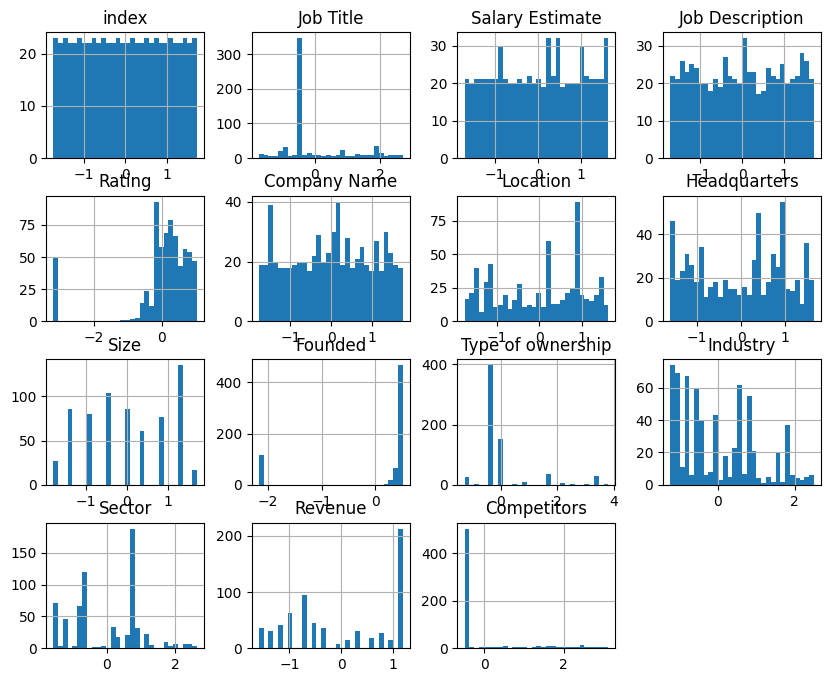

In [ ]:
df.hist(figsize =(10, 8), bins=30)
plt.show()

# Counting no of variables

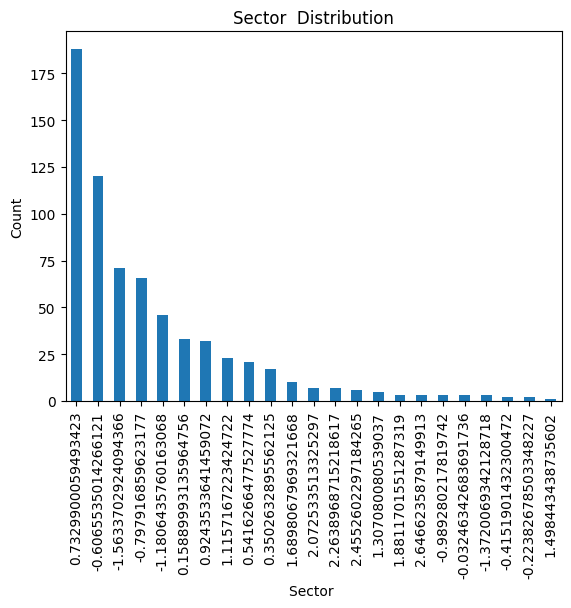

In [ ]:
df['Sector'].value_counts().plot(kind='bar')
plt.xlabel("Sector ")
plt.ylabel("Count")
plt.title("Sector  Distribution")
plt.show()

# Correlation Heatmap


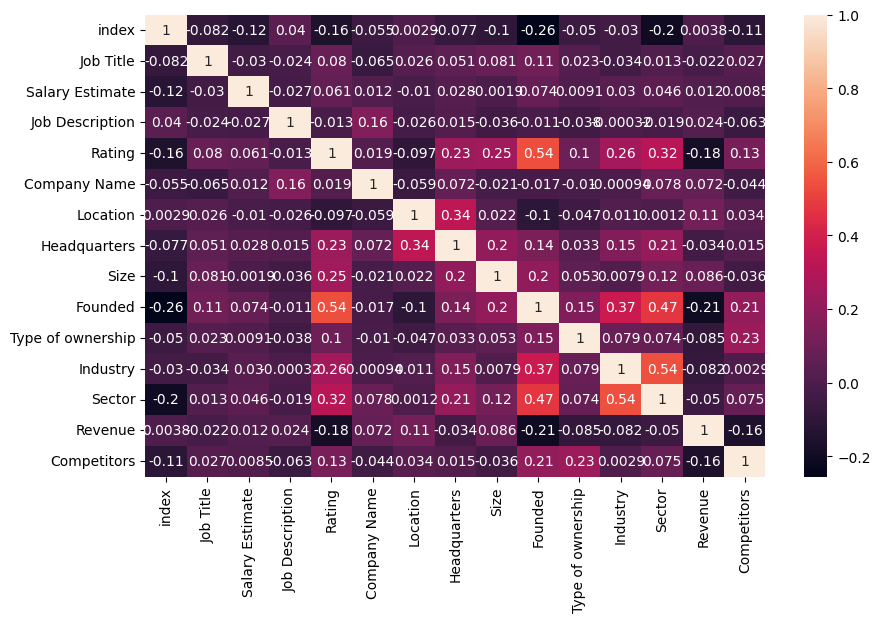

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Box Plot to Detect Outliers

**before capping outliers**

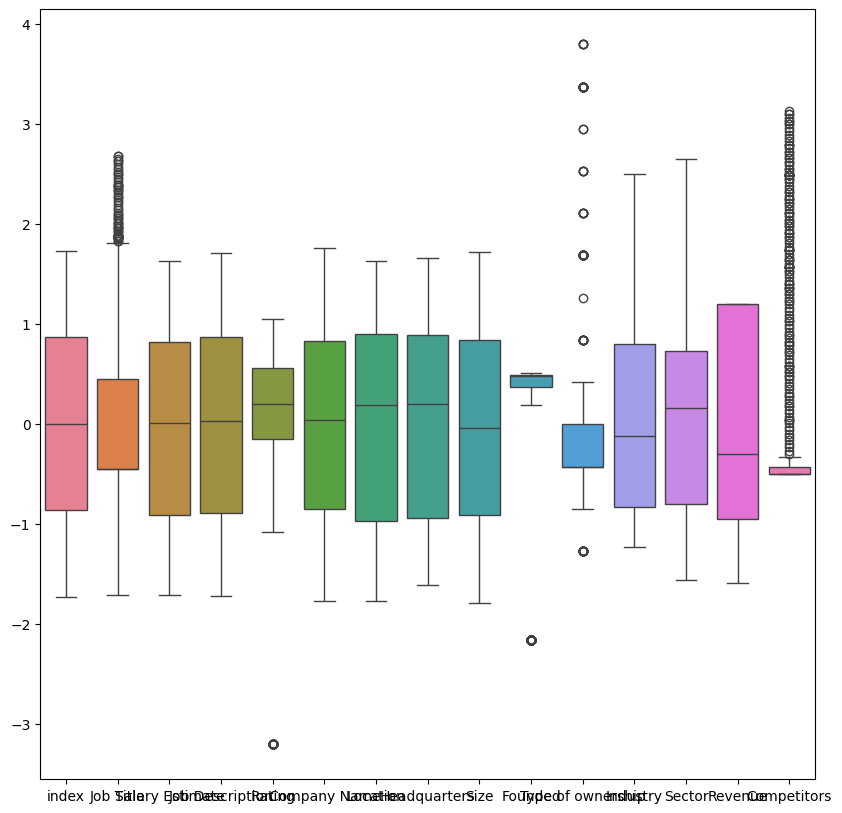

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.show()

# capping to remove outliers

In [ ]:
def iqr_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

for col in df.select_dtypes(include=['number']).columns:
    iqr_capping(df, col)


**after capping**

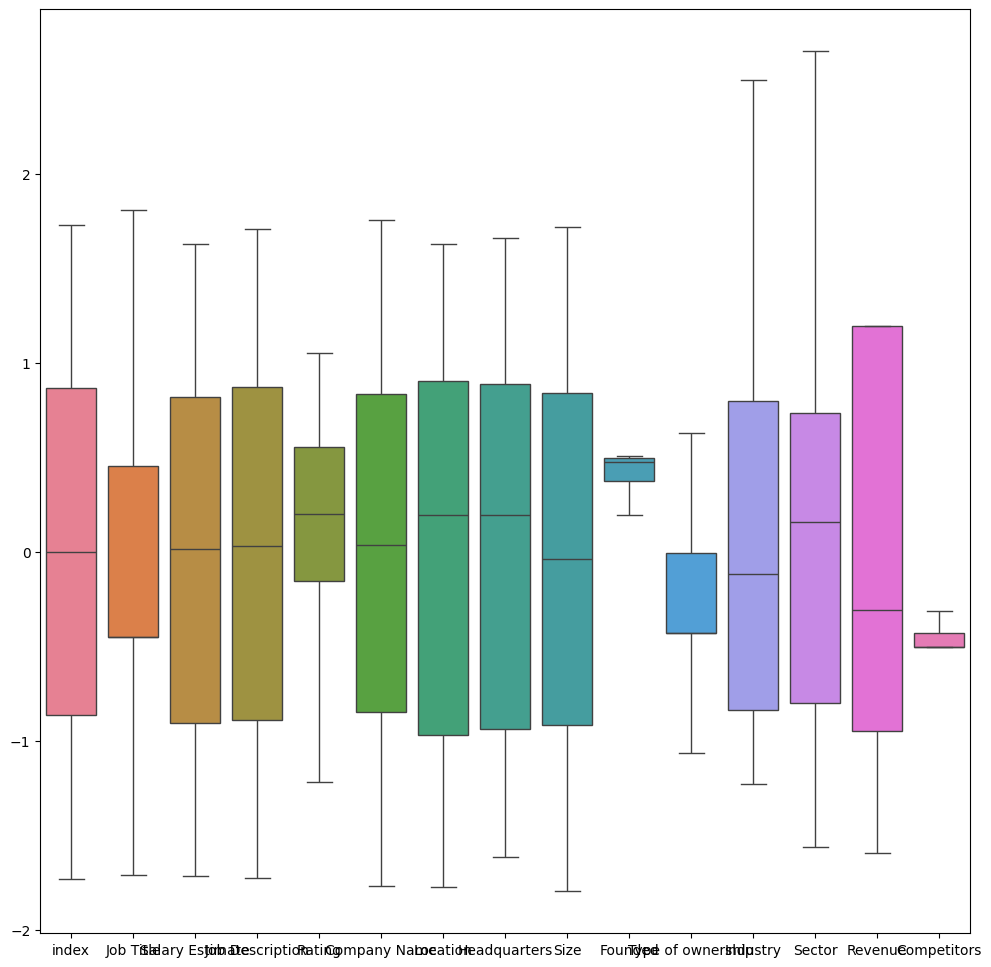

In [ ]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df)
plt.show()

In [ ]:
df.head()

index  Job Title  Salary Estimate  Job Description    Rating  \
0 -1.729475   1.808489        -0.907742        -0.726042 -0.297032   
1 -1.724320  -0.451073        -0.907742         1.031624  0.483509   
2 -1.719165  -0.451073        -0.907742         0.518386  0.199676   
3 -1.714011  -0.451073        -0.907742        -0.367478 -0.013199   
4 -1.708856  -0.451073        -0.907742        -0.845563 -0.438949   

   Company Name  Location  Headquarters      Size   Founded  \
0     -0.338029  0.192522      0.425323 -0.477295  0.472730   
1      0.160926 -1.195053     -0.336281  0.401451  0.439669   
2     -1.515892 -1.459353     -1.212844 -0.477295  0.456860   
3     -0.248054  0.209041     -1.399653  0.840823  0.481987   
4     -1.622227  0.192522      0.425323  1.280196  0.479342   

   Type of ownership  Industry    Sector   Revenue  Competitors  
0           0.628943  0.797587  0.924353  1.195430    -0.314373  
1          -0.005032  1.581945 -0.606554 -1.592417    -0.505670  
2           0.628943 -0.444314 -0.606554 -0.734618    -0.505670  
3          -0.005032 -0.182861  1.115717 -0.734618    -0.314373  
4          -0.427681 -1.097946 -0.606554  1.195430    -0.314373

**dropping all NAN values**

In [ ]:
 # Drops all columns containing any NaN values
df = df.dropna(axis=1)

In [ ]:
df.head()

index  Job Title  Salary Estimate  Job Description    Rating  \
0 -1.729475   1.808489        -0.907742        -0.726042 -0.297032   
1 -1.724320  -0.451073        -0.907742         1.031624  0.483509   
2 -1.719165  -0.451073        -0.907742         0.518386  0.199676   
3 -1.714011  -0.451073        -0.907742        -0.367478 -0.013199   
4 -1.708856  -0.451073        -0.907742        -0.845563 -0.438949   

   Company Name  Location  Headquarters      Size   Founded  \
0     -0.338029  0.192522      0.425323 -0.477295  0.472730   
1      0.160926 -1.195053     -0.336281  0.401451  0.439669   
2     -1.515892 -1.459353     -1.212844 -0.477295  0.456860   
3     -0.248054  0.209041     -1.399653  0.840823  0.481987   
4     -1.622227  0.192522      0.425323  1.280196  0.479342   

   Type of ownership  Industry    Sector   Revenue  Competitors  
0           0.628943  0.797587  0.924353  1.195430    -0.314373  
1          -0.005032  1.581945 -0.606554 -1.592417    -0.505670  
2           0.628943 -0.444314 -0.606554 -0.734618    -0.505670  
3          -0.005032 -0.182861  1.115717 -0.734618    -0.314373  
4          -0.427681 -1.097946 -0.606554  1.195430    -0.314373

# droppping unwanted coloumn

In [ ]:
df = df.drop(columns=['Location','Headquarters','Type of ownership','Industry'])

In [ ]:
df.head()

index  Job Title  Salary Estimate  Job Description    Rating  \
0 -1.729475   1.808489        -0.907742        -0.726042 -0.297032   
1 -1.724320  -0.451073        -0.907742         1.031624  0.483509   
2 -1.719165  -0.451073        -0.907742         0.518386  0.199676   
3 -1.714011  -0.451073        -0.907742        -0.367478 -0.013199   
4 -1.708856  -0.451073        -0.907742        -0.845563 -0.438949   

   Company Name      Size   Founded    Sector   Revenue  Competitors  
0     -0.338029 -0.477295  0.472730  0.924353  1.195430    -0.314373  
1      0.160926  0.401451  0.439669 -0.606554 -1.592417    -0.505670  
2     -1.515892 -0.477295  0.456860 -0.606554 -0.734618    -0.505670  
3     -0.248054  0.840823  0.481987  1.115717 -0.734618    -0.314373  
4     -1.622227  1.280196  0.479342 -0.606554  1.195430    -0.314373

# Pairplot

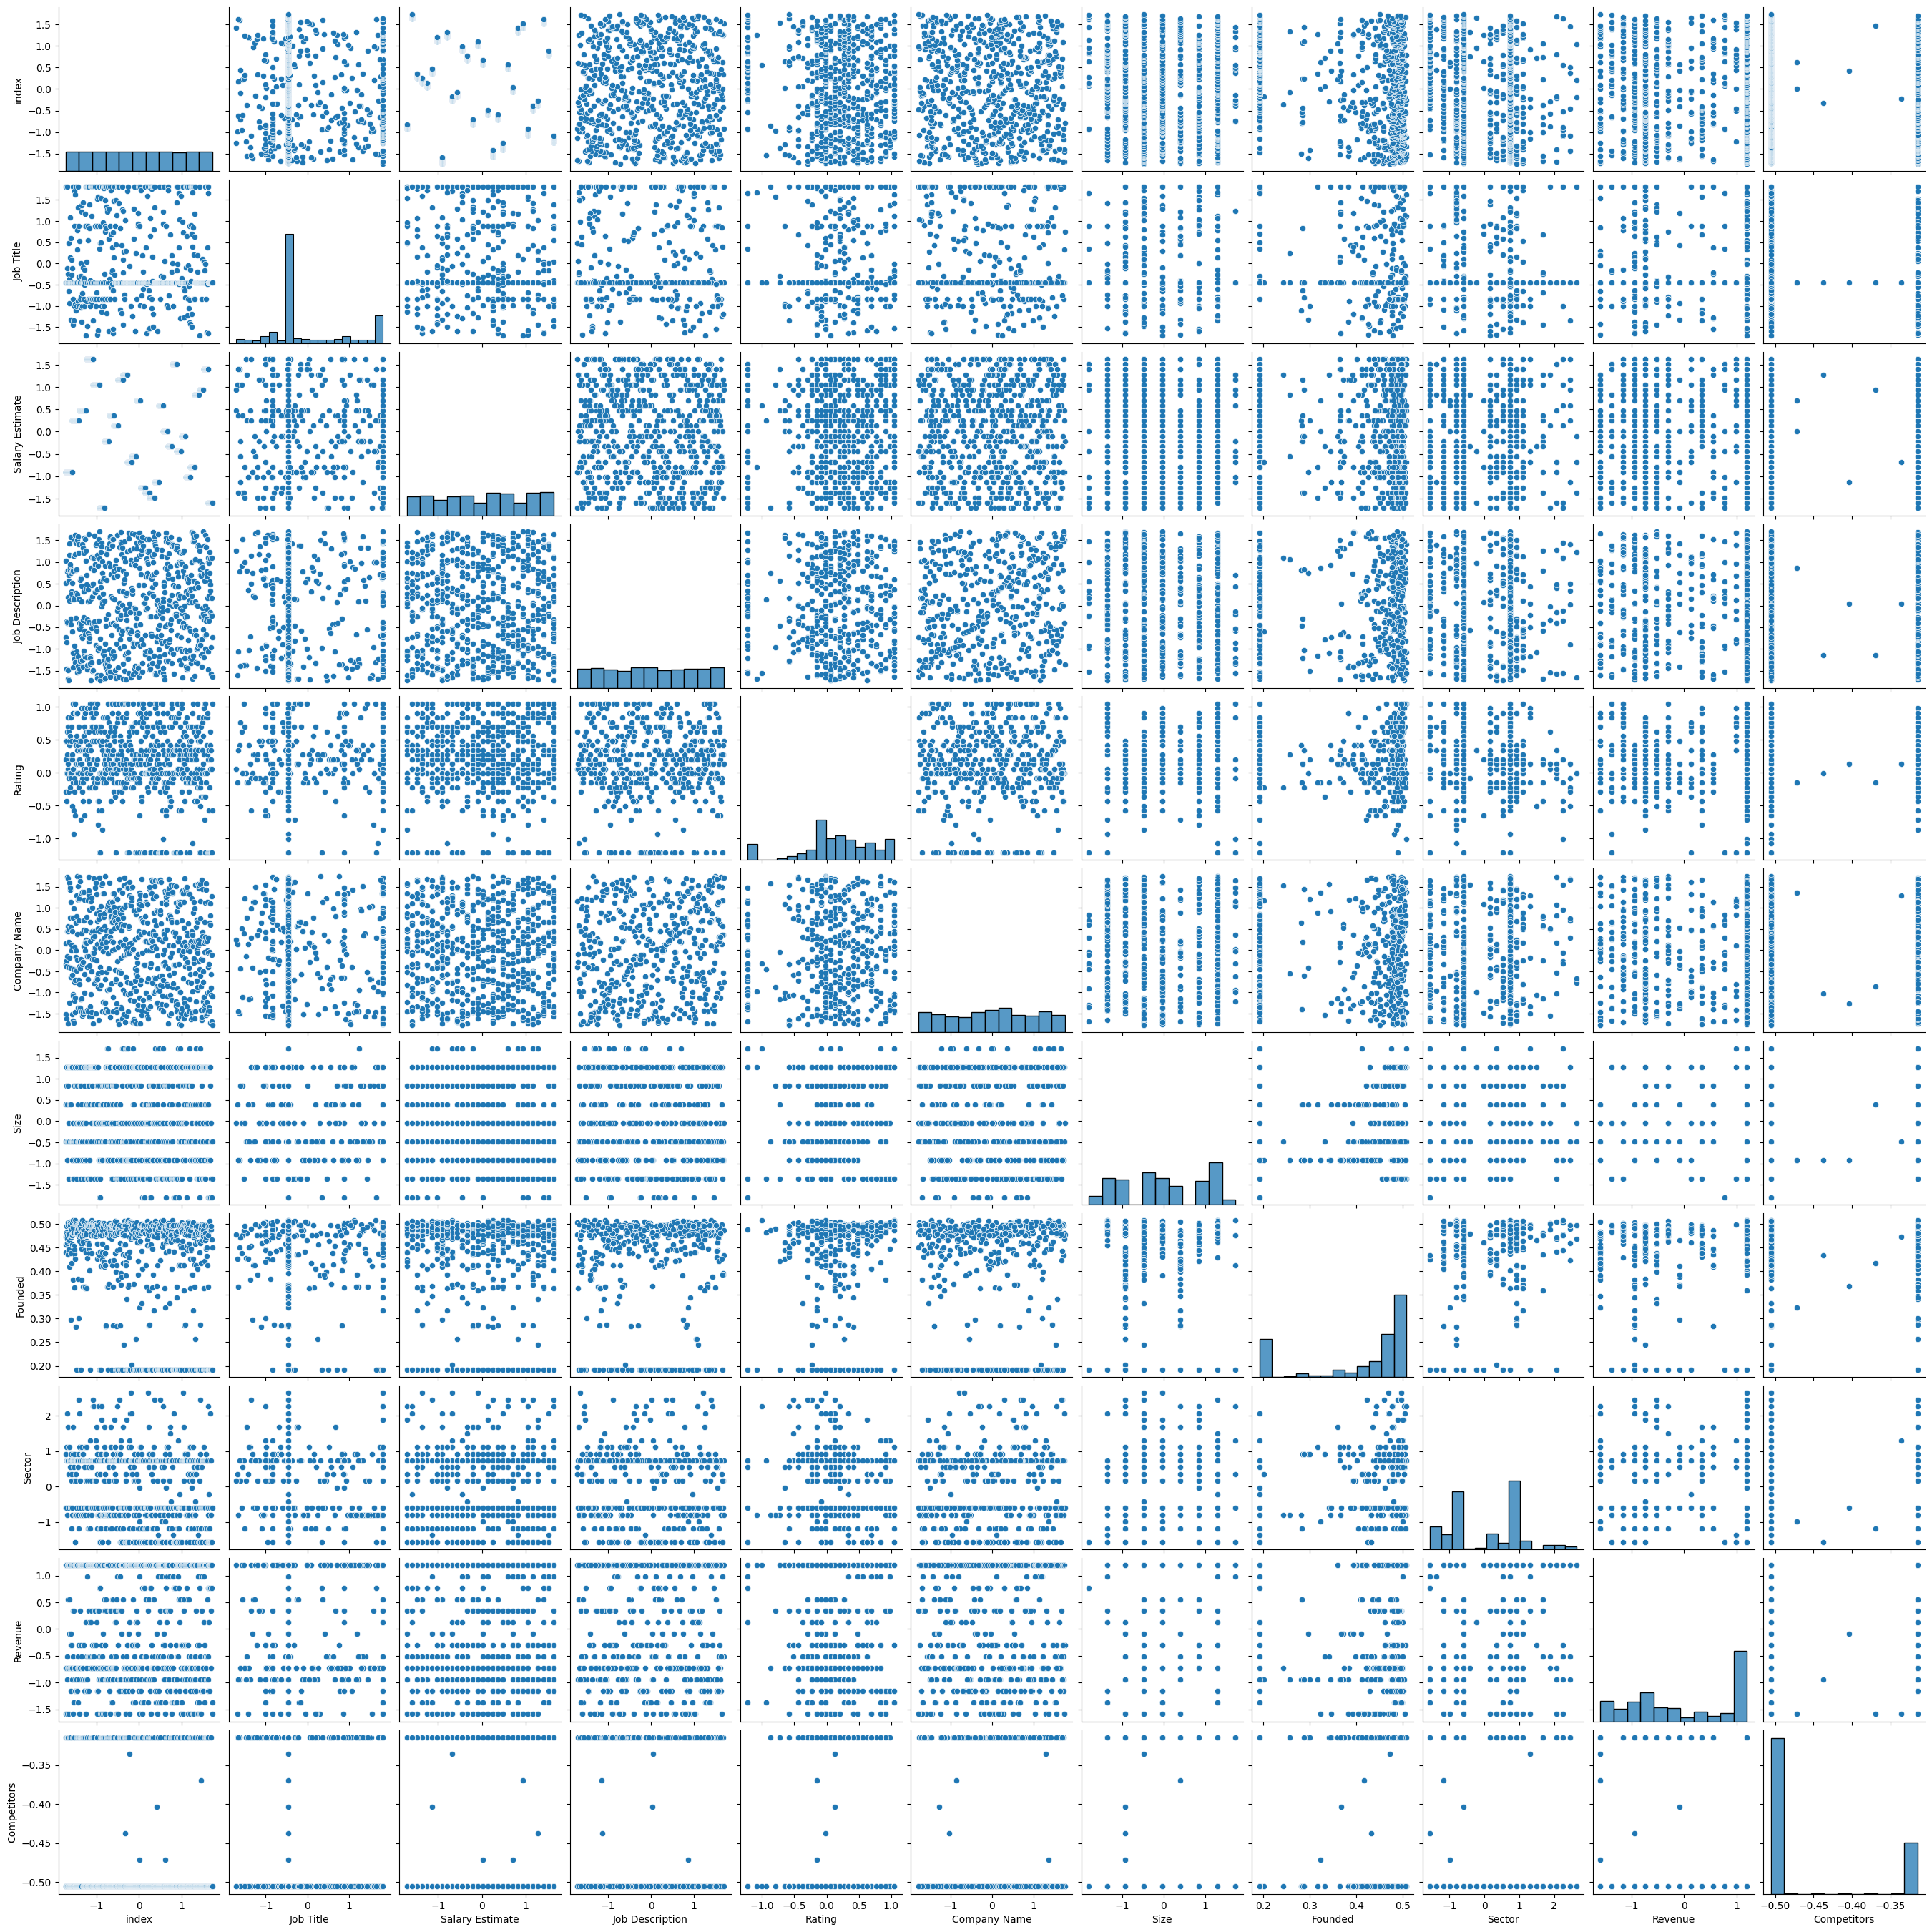

In [ ]:
sns.pairplot(df)
plt.show()

### **Importing the libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

#### **Importing the data set 2**

In [3]:
df = pd.read_csv("/content/laptopData.csv")

#### **Infomation about the data set 2**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


#### **Description of the Data Set 1**

In [6]:
df.describe()

Unnamed: 0          Price
count  1273.000000    1273.000000
mean    652.674784   59955.814073
std     376.493027   37332.251005
min       0.000000    9270.720000
25%     327.000000   31914.720000
50%     652.000000   52161.120000
75%     980.000000   79333.387200
max    1302.000000  324954.720000

# Handling missing values

In [7]:
 # Check for missing values
 print(df.isnull().sum())

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


In [8]:
 # Handling numerical columns (fill with mean)
 df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).apply(lambda x: x.fillna(x.mean()))
 # Handling categorical columns (fill with mode)
 df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.fillna(x.mode()[0]))

In [9]:
 # Check for missing values
 print(df.isnull().sum())

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


# Encoding Categorical Variables

In [11]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
 df[col] = le.fit_transform(df[col])

# Feature Scaling

In [13]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

# Data Visualization

**Histogram of All Numeric**

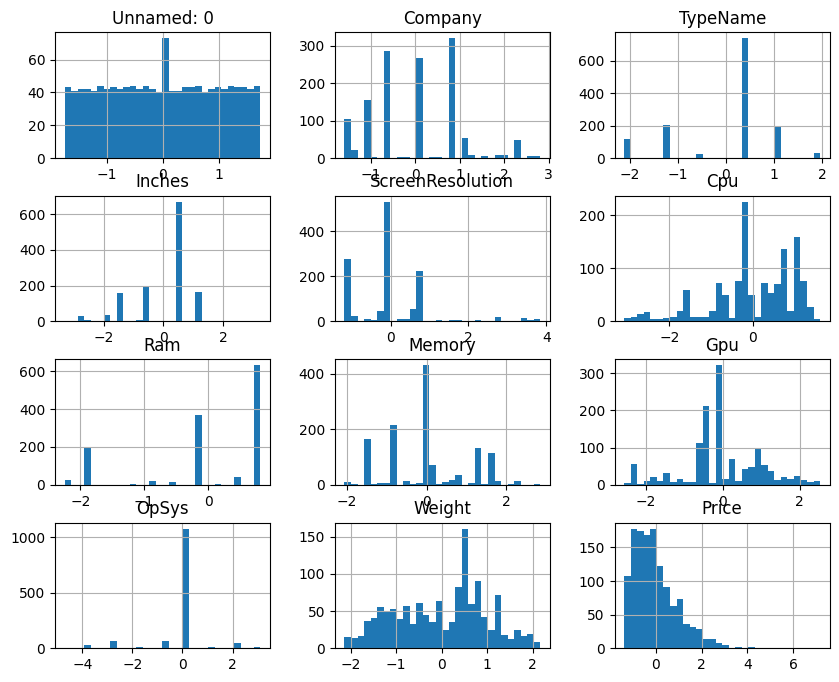

In [15]:
df.hist(figsize =(10, 8), bins=30)
plt.show()

#Correlation Heatmap

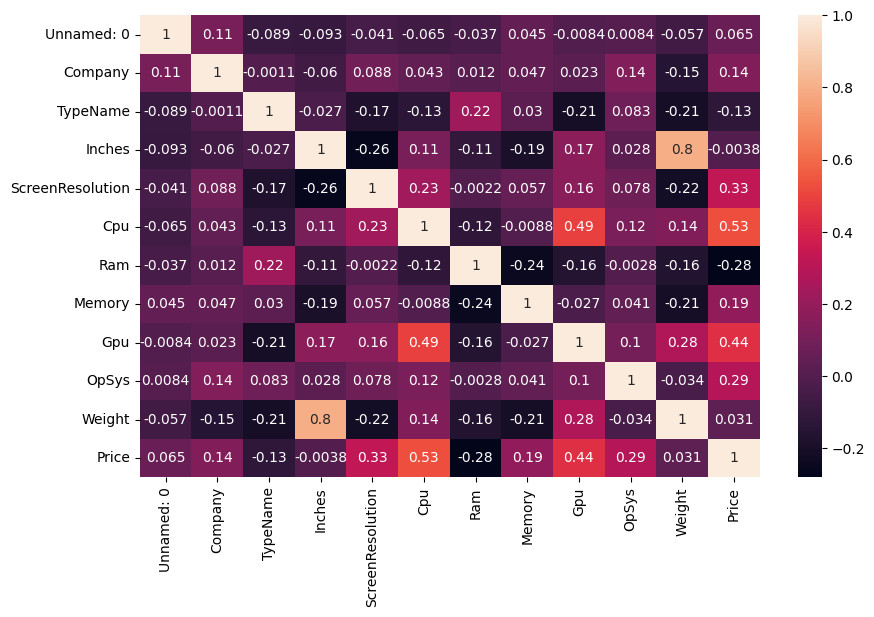

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Pairplot

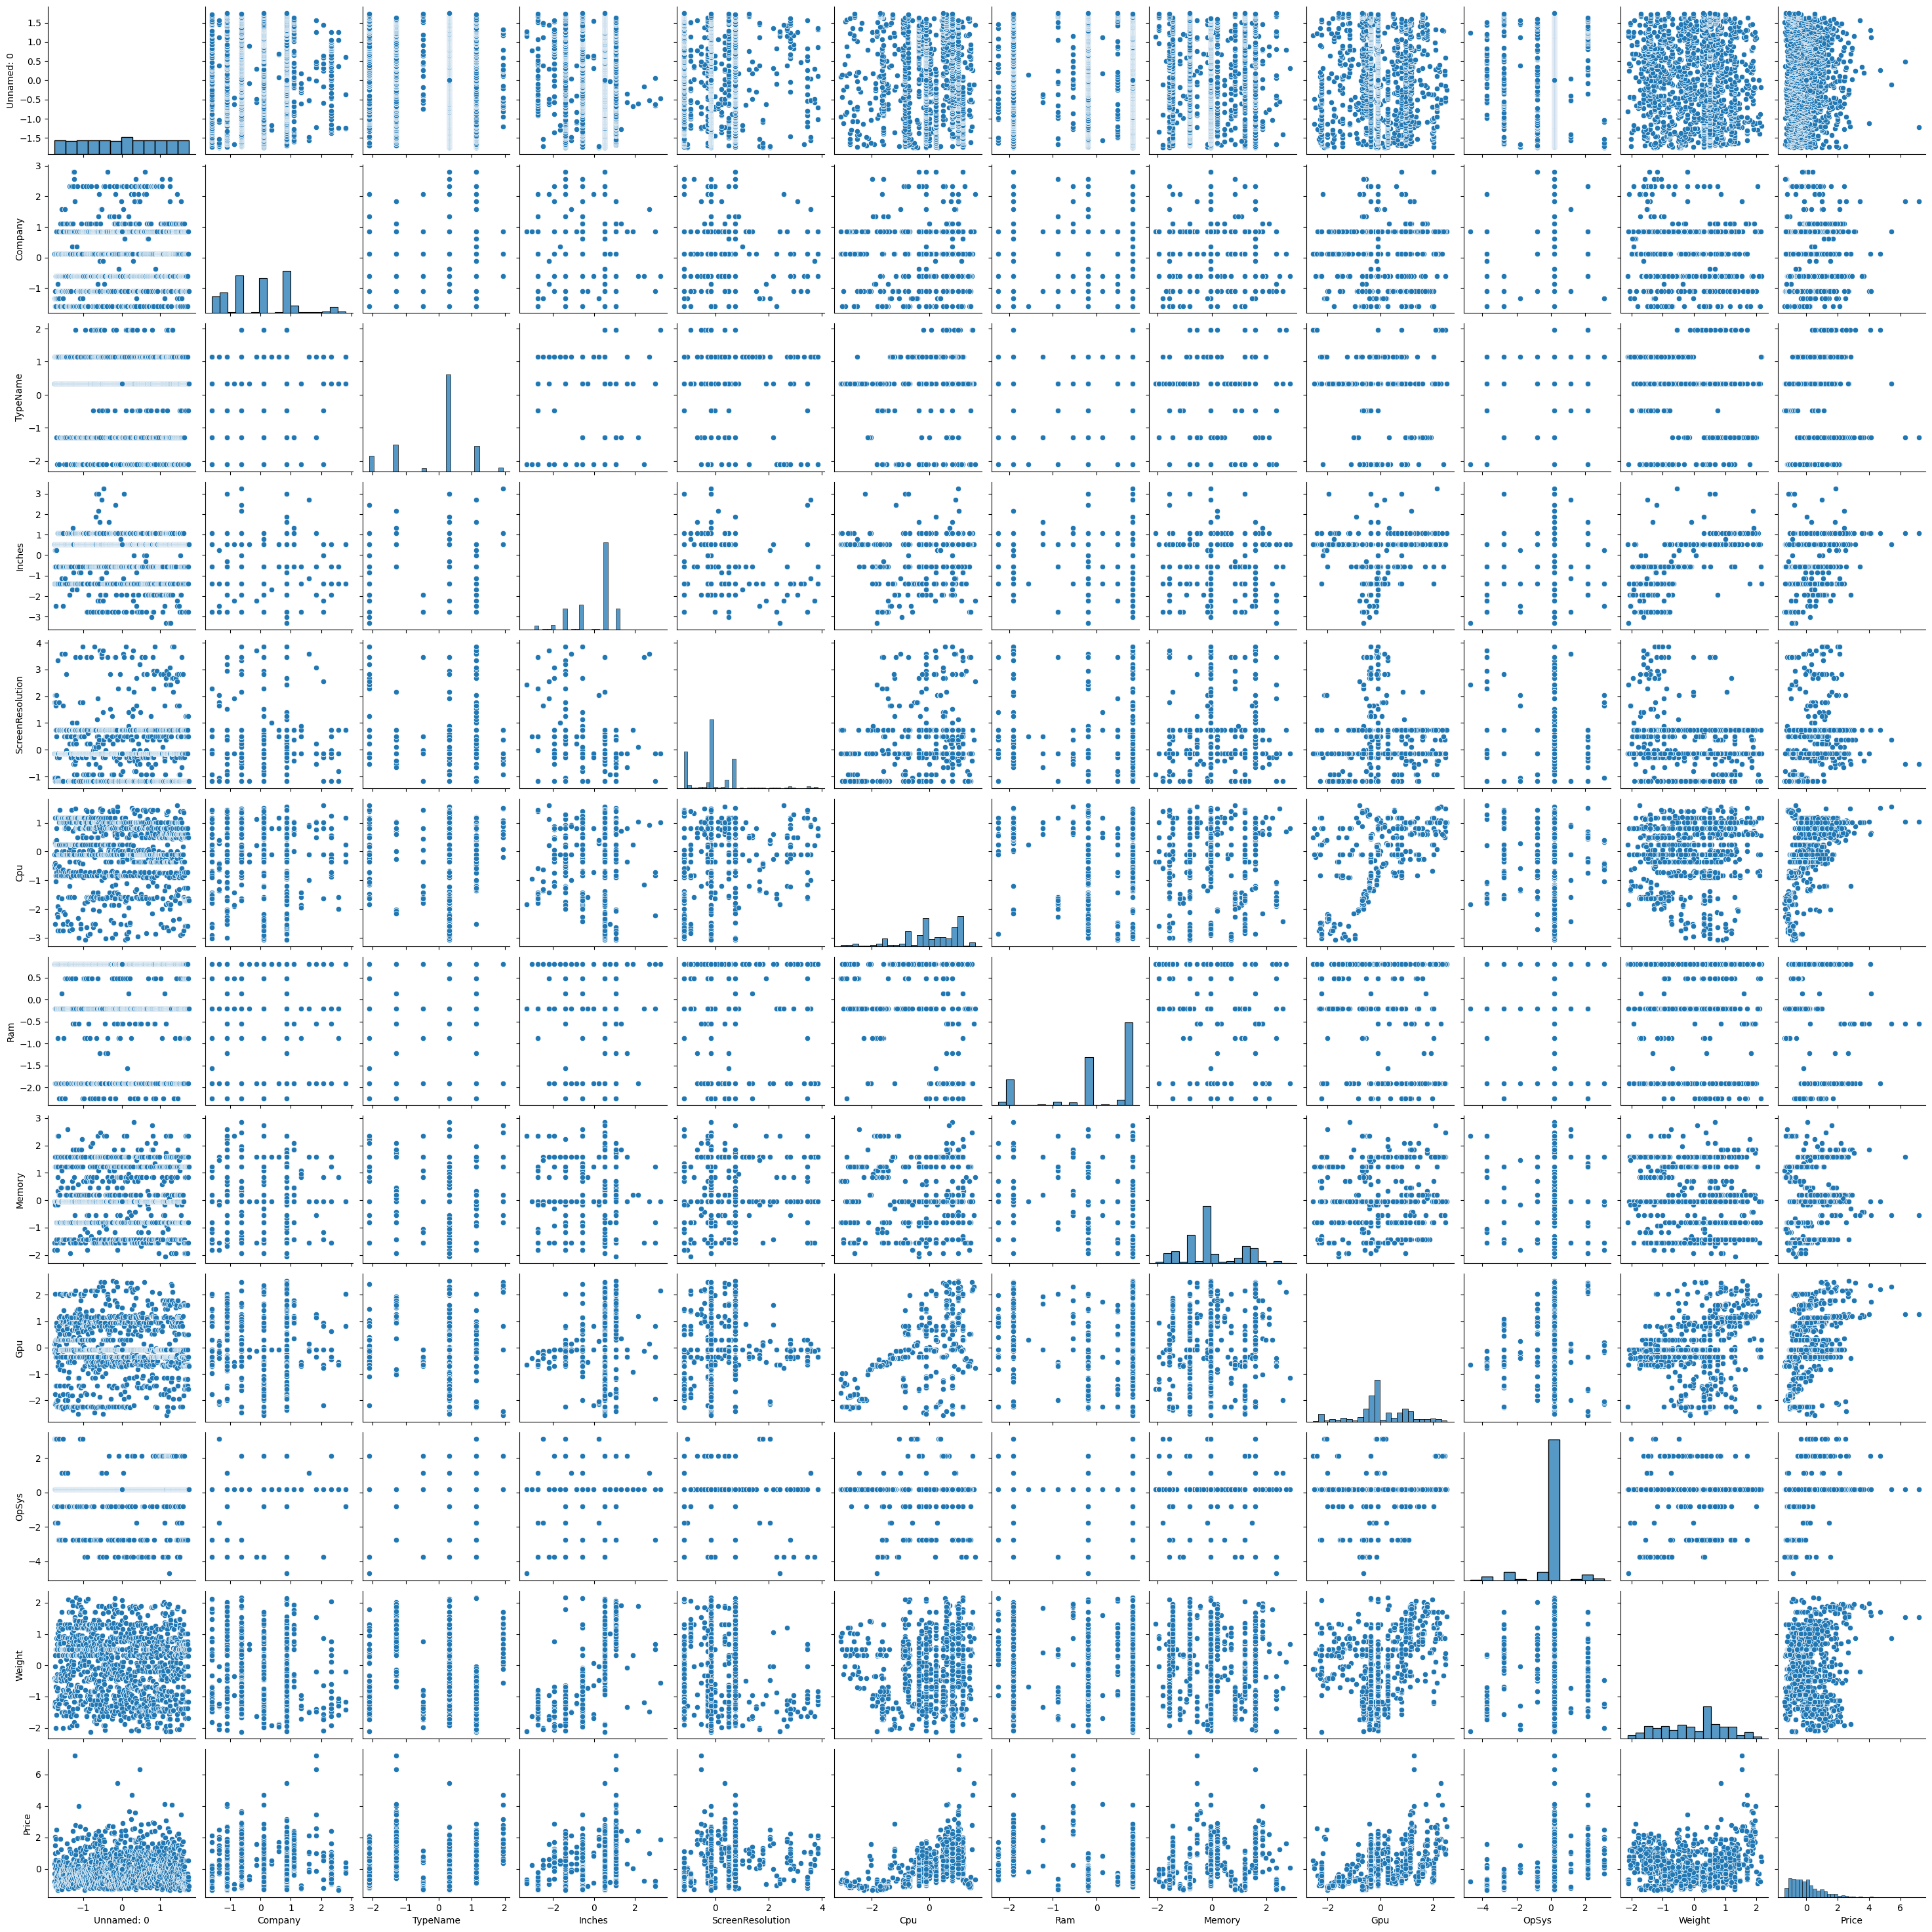

In [17]:
 sns.pairplot(df)
 plt.show()

# Box Plot to Detect Outliers

**BEFORE CAPPING OUTLIERS**

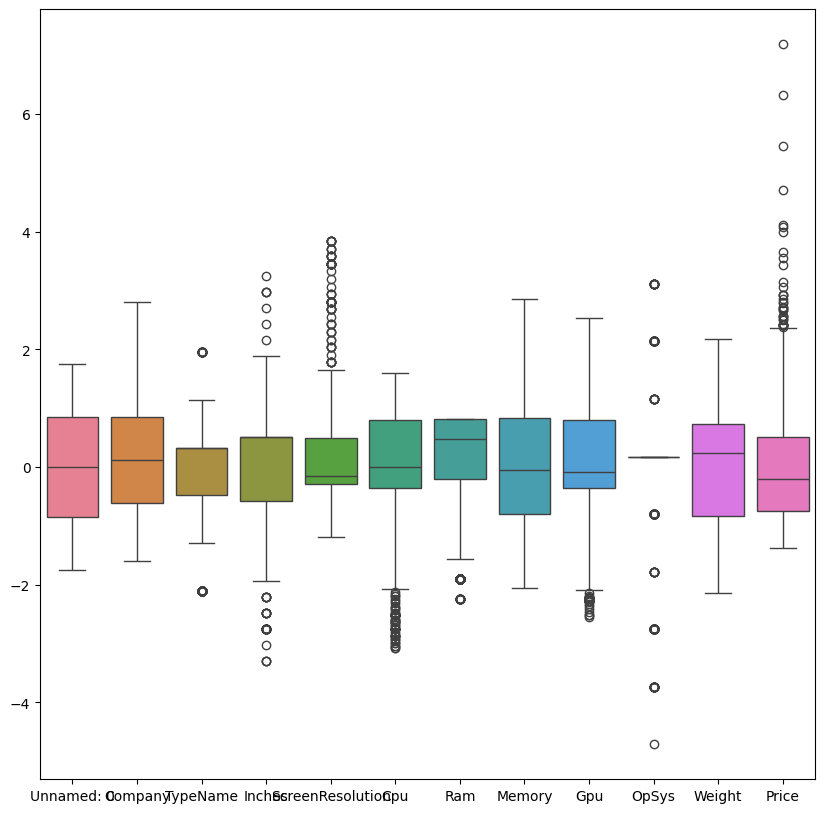

In [18]:
 plt.figure(figsize=(10, 10))
 sns.boxplot(data=df)
 plt.show()

# capping to remove outliers

In [22]:
def iqr_capping(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.clip(df[col], lower_bound, upper_bound)

for col in df.select_dtypes(include=['number']).columns:
  iqr_capping(df, col)

# after capping

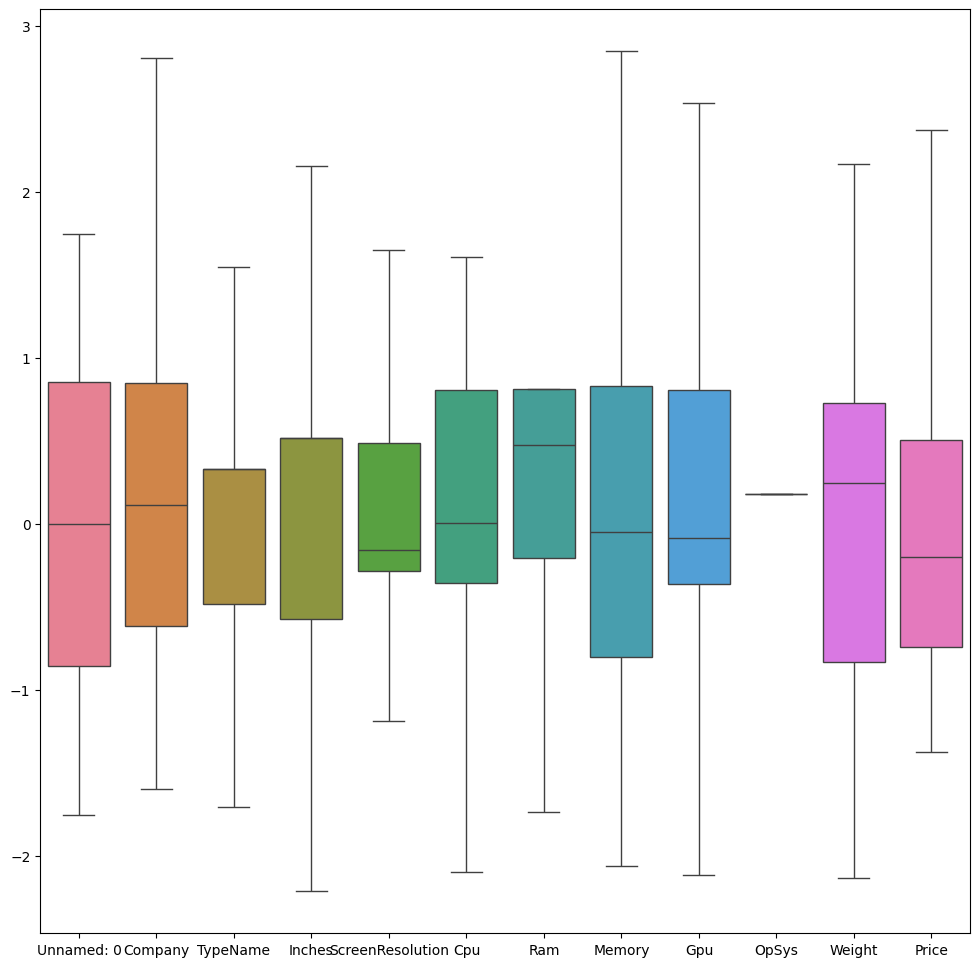

In [24]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df)
plt.show()

### **RESULT :**

### The dataset has been cleaned, missing values handled, outliers treated, and categorical variables encoded. Data distributions have been visualized, ensuring consistency for further analysis and modeling.